# Operasi pada Sinyal dan Citra

In [9]:
import numpy as np
import librosa
import matplotlib.pyplot as plt


## Contoh Penjumlahan Sinyal 1D

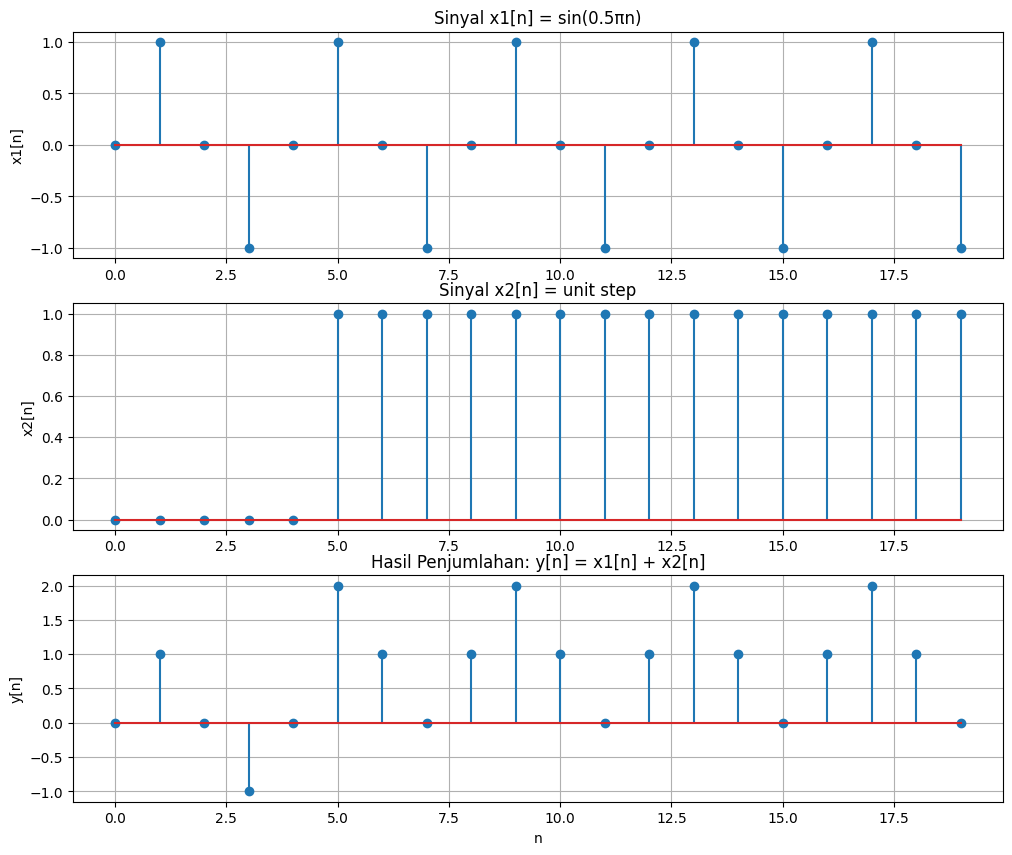

In [10]:
n = np.arange(0, 20)

x1 = np.sin(0.5 * np.pi * n)
x2 = np.heaviside(n - 5, 1)  

y = x1 + x2

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.stem(n, x1)
plt.title("Sinyal x1[n] = sin(0.5πn)")
plt.ylabel("x1[n]")

plt.grid(True)                     

plt.subplot(3, 1, 2)
plt.stem(n, x2)
plt.title("Sinyal x2[n] = unit step")
plt.ylabel("x2[n]")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, y)
plt.title("Hasil Penjumlahan: y[n] = x1[n] + x2[n]")
plt.ylabel("y[n]")
plt.xlabel("n")
plt.grid(True)

## Contoh penjumlahan citra 2D

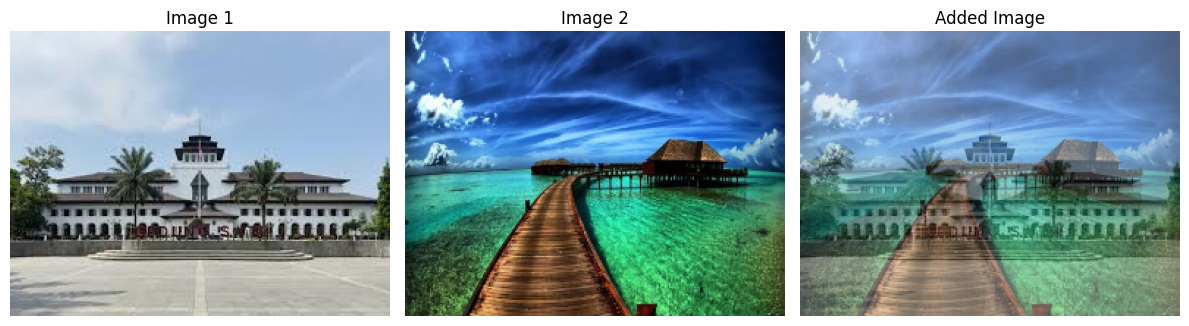

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('gambar1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR).astype(np.float32) / 255.0 
img2 = cv2.imread('gambar2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR).astype(np.float32) / 255.0

height, width = min(img1.shape[0], img2.shape[0]), min(img1.shape[1], img2.shape[1])
img1_resized = cv2.resize(img1, (width, height))
img2_resized = cv2.resize(img2, (width, height))


img_added = cv2.add(0.5 * img1_resized, 0.5 * img2_resized) 

img_added = np.clip(img_added, 0.0, 1.0)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Image 1")
plt.imshow(img1_resized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Image 2")
plt.imshow(img2_resized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Added Image")
plt.imshow(img_added, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


 ## Operasi Penggeseran Sinyal
   
Fungsi np.roll() dari NumPy akan menggeser isi array sebanyak shift elemen.
Perbedaannya dengan shifting biasa adalah elemen yang “keluar” dari ujung array akan masuk kembali dari sisi sebaliknya.

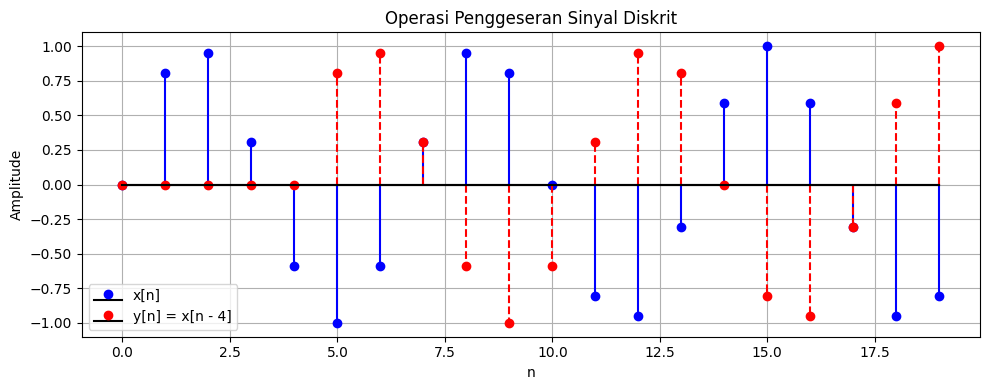

In [12]:

n = np.arange(0, 20)
x = np.sin(0.3 * np.pi * n)


k = 4 
y = np.roll(x, k)
y[:k] = 0 

# Plot
plt.figure(figsize=(10, 4))
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt='k-', label='x[n]')
plt.stem(n, y, linefmt='r--', markerfmt='ro', basefmt='k-', label='y[n] = x[n - 4]')
plt.title("Operasi Penggeseran Sinyal Diskrit")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##  Contoh Penggeseran citra 2D

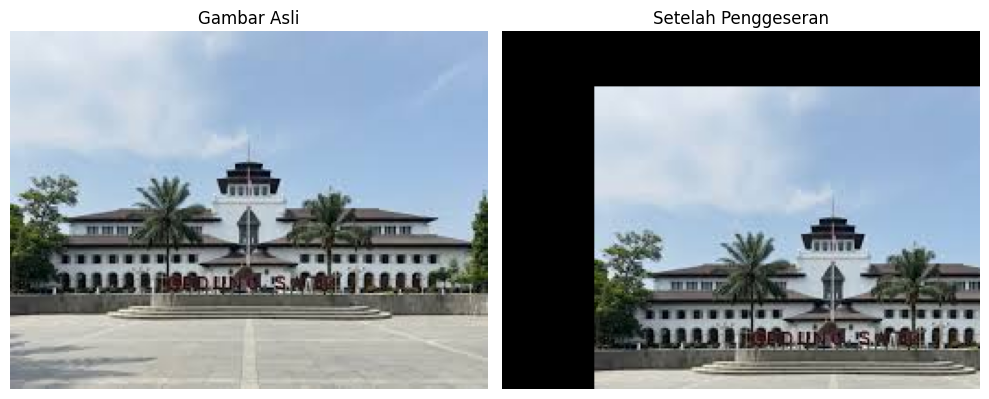

In [13]:

img = cv2.imread('gambar1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR).astype(np.float32) / 255.0 


tx, ty = 50, 30

rows, cols, c = img.shape

M = np.float32([[1, 0, tx],
                [0, 1, ty]])


shifted_img = cv2.warpAffine(img, M, (cols, rows))


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Setelah Penggeseran")
plt.imshow(shifted_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Amplifikasi Sinyal dan Citra

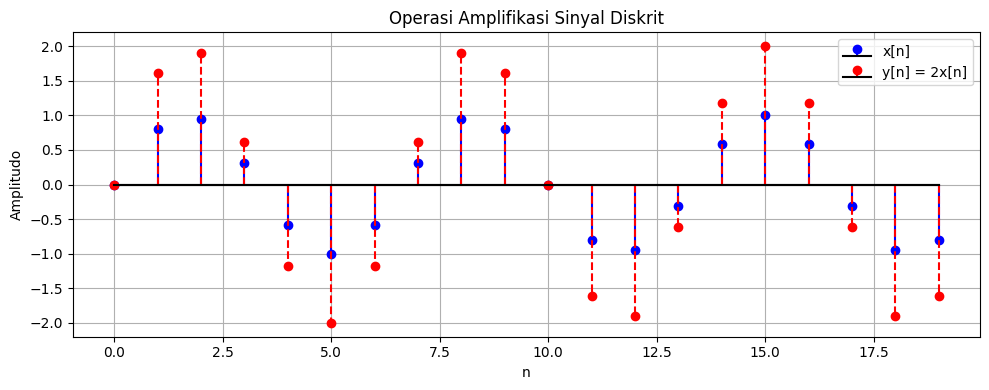

In [14]:
n = np.arange(0, 20)
x = np.sin(0.3 * np.pi * n)

alpha = 2.0 
y = alpha * x

# Plot
plt.figure(figsize=(10, 4))
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt='k-', label='x[n]')
plt.stem(n, y, linefmt='r--', markerfmt='ro', basefmt='k-', label='y[n] = 2x[n]')
plt.title("Operasi Amplifikasi Sinyal Diskrit")
plt.xlabel("n")
plt.ylabel("Amplitudo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Contoh Amplifikasi Citra 2D

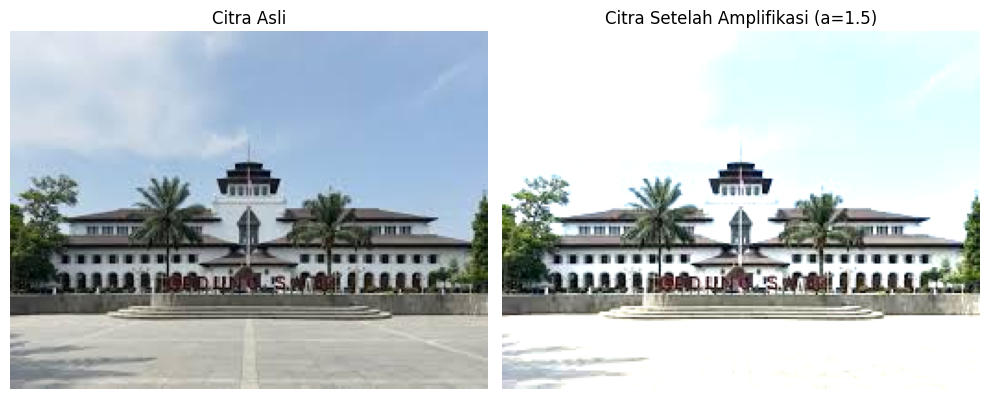

In [15]:
img = cv2.imread('gambar1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR).astype(np.float32) / 255.0 

alpha = 1.5  
img_amplified = alpha * img
img_amplified = np.clip(img_amplified, 0, 1)

# Tampilkan hasil
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Citra Setelah Amplifikasi (a={alpha})")
plt.imshow(img_amplified, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Cascade pada sinyal 1D

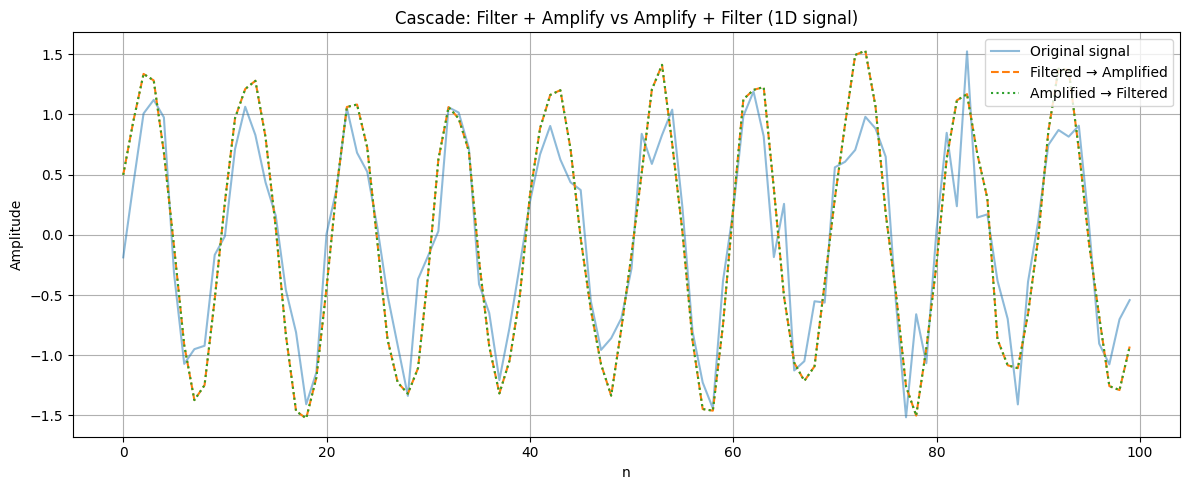

In [16]:
n = np.arange(0, 100)
x = np.sin(0.2 * np.pi * n) + 0.3 * np.random.randn(100)  

def moving_average(x, w=5):
    return np.convolve(x, np.ones(w)/w, mode='same')

def amplify(x, factor=2):
    return factor * x

# Cascade 1: filter → amplify
y1 = amplify(moving_average(x))

# Cascade 2: amplify → filter
y2 = moving_average(amplify(x))

# Plot hasil
plt.figure(figsize=(12, 5))
plt.plot(n, x, label='Original signal', alpha=0.5)
plt.plot(n, y1, label='Filtered → Amplified', linestyle='--')
plt.plot(n, y2, label='Amplified → Filtered', linestyle=':')
plt.title("Cascade: Filter + Amplify vs Amplify + Filter (1D signal)")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Cascade pada citra 2D

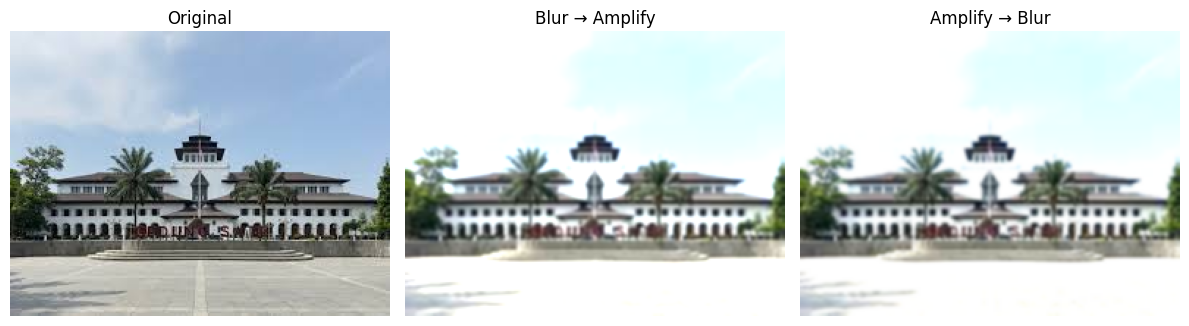

In [17]:
img = cv2.imread('gambar1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR).astype(np.float32) / 255.0 
# Filter gaussian blur
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Amplifikasi
def amplify(img, factor=1.5):
    return np.clip(img * factor, 0, 1)

# Cascade 1: blur → amplify
result1 = amplify(img_blur)

# Cascade 2: amplify → blur
result2 = cv2.GaussianBlur(amplify(img), (5, 5), 0)

# Plot hasil
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Blur → Amplify")
plt.imshow(result1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Amplify → Blur")
plt.imshow(result2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Sintesis vs Dekomposisi

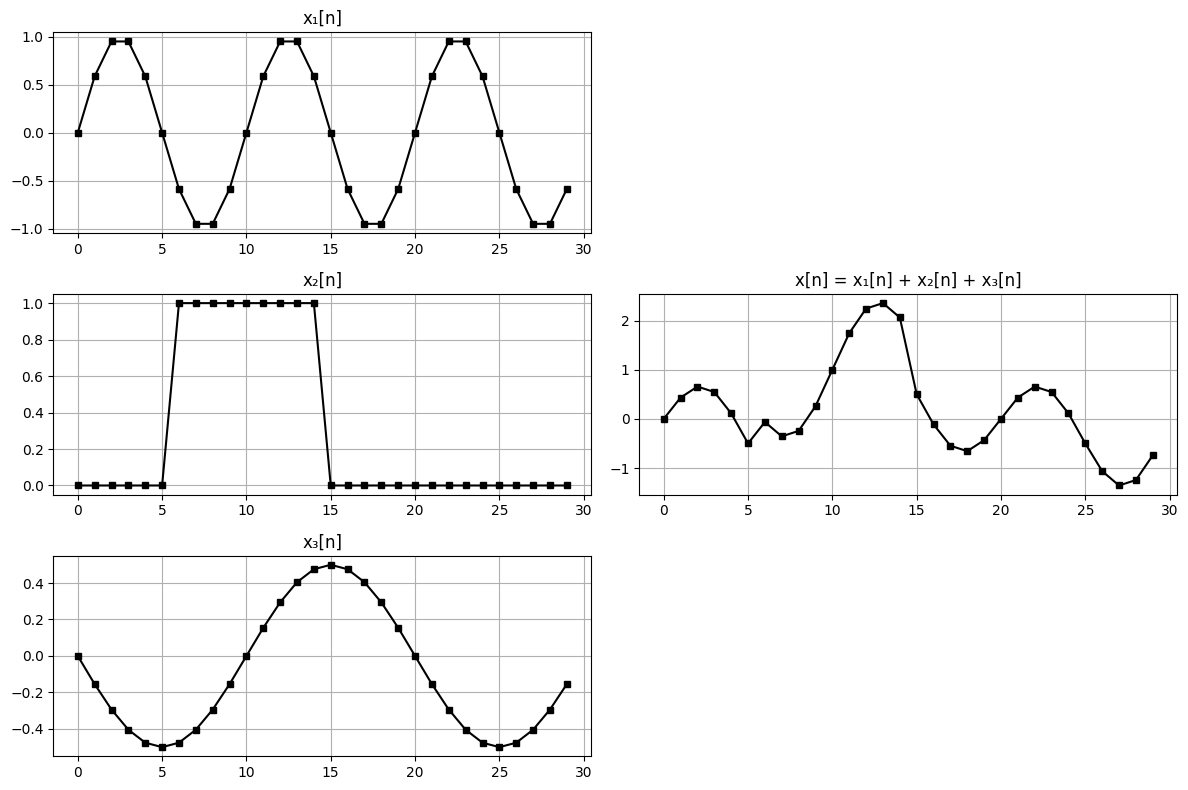

In [18]:
n = np.arange(0, 30)

x1 = np.sin(2 * np.pi * 0.1 * n)               
x2 = np.where((n > 5) & (n < 15), 1.0, 0.0)     
x3 = -0.5 * np.sin(2 * np.pi * 0.05 * n)         

x = x1 + x2 + x3
fig, axs = plt.subplots(3, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

axs[0, 0].plot(n, x1, 'k-')
axs[0, 0].plot(n, x1, 'ks', markersize=5)
axs[0, 0].set_title('x₁[n]')
axs[0, 0].grid(True)

axs[1, 0].plot(n, x2, 'k-')
axs[1, 0].plot(n, x2, 'ks', markersize=5)
axs[1, 0].set_title('x₂[n]')
axs[1, 0].grid(True)

axs[2, 0].plot(n, x3, 'k-')
axs[2, 0].plot(n, x3, 'ks', markersize=5)
axs[2, 0].set_title('x₃[n]')
axs[2, 0].grid(True)

axs[1, 1].plot(n, x, 'k-')
axs[1, 1].plot(n, x, 'ks', markersize=5)
axs[1, 1].set_title('x[n] = x₁[n] + x₂[n] + x₃[n]')
axs[1, 1].grid(True)

axs[0, 1].axis('off')
axs[2, 1].axis('off')

plt.tight_layout()
plt.savefig('sintesis.png')
plt.show()